In [2]:
# Temorarily add source code path
import sys
import os
sys.path.insert(0, os.path.realpath('../'))

In [3]:
# Standard imports
import pandas as pd
import numpy as np
import requests
from helpers import *
from bs4 import BeautifulSoup

%matplotlib inline

In [4]:
# Create NSE Object
from nse import NSE
nse = NSE()

In [5]:
returns = nse.get_symbol_eod_values()
close = nse.get_symbol_eod_values(data='close')
returns['2017-2'].head()

symbol,20microns,3iinfotech,3mindia,63moons,8kmiles,a2zinfra,aartidrugs,aartiind,aarveeden,aban,...,zeemedia,zenithexpo,zensartech,zentec,zicom,zodiacloth,zodjrdmkj,zuari,zuariglob,zyduswell
date,,,,,,,,,,,,,,,,,,,,,
2017-02-01,0.024220,0.000000,-0.016327,0.009901,0.005314,0.013150,0.000726,0.018825,0.004066,0.010625,...,0.020094,NaN,-0.012909,0.015079,-0.001133,-0.022503,NaN,-0.011227,0.000880,0.003281
2017-02-02,0.016240,-0.018019,-0.007483,0.006751,0.024484,0.010632,-0.008017,0.007215,0.011528,0.028058,...,0.009241,NaN,0.009599,-0.004773,0.007905,0.012118,-0.050661,0.000903,0.004390,-0.011095
2017-02-03,0.003711,0.000000,-0.006401,0.012158,0.006898,-0.005893,0.002598,0.034855,0.048108,-0.029685,...,0.010458,NaN,-0.004054,0.004093,-0.001125,0.029018,-0.038659,-0.025592,0.009590,0.005967
2017-02-06,0.021979,0.000000,0.032559,0.018558,-0.003324,0.024520,0.026726,0.019780,0.018399,0.005077,...,-0.030365,0.008386,0.012783,0.105837,0.008969,-0.027948,-0.014706,0.009674,0.039554,0.000462
2017-02-07,-0.010929,0.018019,-0.007819,-0.013736,-0.013649,0.038466,-0.008166,0.007166,-0.020586,-0.010179,...,-0.017580,NaN,0.005057,-0.076986,0.000000,0.041634,0.013245,-0.008440,-0.028338,-0.007709


In [6]:
symbols = ['hindalco', 'rblbank', 'mmtc', 'infy']
close = close[symbols]['2016':]
returns = returns[symbols]['2016':]

In [26]:
transactions = pd.DataFrame(
#     index=pd.date_range(start='2017-01-01', end='2017-03-01'),
    columns=['symbol', 'date', 'type', 'quantity', 'price',]
)
transactions.loc[0] = ['hindalco', pd.to_datetime('2017-01-02'), 'buy', 4, 150]
transactions.loc[1] = ['hindalco', pd.to_datetime('2017-02-02'), 'sell', 2, 192]
transactions.loc[8] = ['hindalco', pd.to_datetime('2017-02-28'), 'sell', 2, 192]
transactions.loc[2] = ['rblbank', pd.to_datetime('2017-01-04'), 'buy', 4, 342]
transactions.loc[3] = ['mmtc', pd.to_datetime('2017-02-08'), 'buy', 4, 66]
transactions.loc[4] = ['mmtc', pd.to_datetime('2017-02-08'), 'sell', 4, 68]
transactions.loc[5] = ['rblbank', pd.to_datetime('2017-02-03'), 'sell',2, 392]
transactions.loc[6] = ['rblbank', pd.to_datetime('2017-02-08'), 'buy', 4, 342]
transactions.loc[7] = ['infy', pd.to_datetime('2017-02-28'), 'buy', 4, 1000] 

transactions['open_con'] = False
transactions['intra'] = False
transactions['closed_con'] = False
transactions['open'] = False
transactions['closed'] = False

transactions['buy'] = transactions['type'].apply(lambda x : 1 if x == 'buy' else -1)
transactions['quantity'] = transactions.buy * transactions['quantity']
transactions

,symbol,date,type,quantity,price,open_con,intra,closed_con,open,closed,buy
0,hindalco,2017-01-02,buy,4.0,150.0,False,False,False,False,False,1
1,hindalco,2017-02-02,sell,-2.0,192.0,False,False,False,False,False,-1
8,hindalco,2017-02-28,sell,-2.0,192.0,False,False,False,False,False,-1
2,rblbank,2017-01-04,buy,4.0,342.0,False,False,False,False,False,1
3,mmtc,2017-02-08,buy,4.0,66.0,False,False,False,False,False,1
4,mmtc,2017-02-08,sell,-4.0,68.0,False,False,False,False,False,-1
5,rblbank,2017-02-03,sell,-2.0,392.0,False,False,False,False,False,-1
6,rblbank,2017-02-08,buy,4.0,342.0,False,False,False,False,False,1
7,infy,2017-02-28,buy,4.0,1000.0,False,False,False,False,False,1


In [28]:
classified_trasactions = pd.DataFrame(columns=transactions.columns)
# categorize transactions into intraday or open positions or closed positions
open_ = transactions.symbol.value_counts()
open_ = open_[open_ == 1].index
cond = transactions.symbol.isin(open_)
transactions.loc[cond, ['open_con']] = True
# open_trans = transactions.loc[cond, :]

# classified_trasactions = classified_trasactions.append(open_trans, ignore_index=True)
# transactions = transactions.drop(open_trans.index).reset_index(drop=True)

intra = transactions.groupby(['date', 'symbol']).quantity.sum().reset_index()
intra = intra.query('quantity == 0')
cond = (transactions.date.isin(intra.date)) & (transactions.symbol.isin(intra.symbol))
transactions.loc[cond, ['intra']] = True
# intra_trans = transactions.loc[cond, :]

# classified_trasactions = classified_trasactions.append(intra_trans, ignore_index=True)
# transactions = transactions.drop(intra_trans.index).reset_index(drop=True)

symbol_group = transactions.groupby(['symbol']).quantity.sum().reset_index()
closed = symbol_group.query('quantity == 0')
cond = transactions.symbol.isin(closed.symbol)
transactions.loc[cond, 'closed'] = True

open_ = symbol_group.query('quantity != 0')
cond = transactions.symbol.isin(open_.symbol)
transactions.loc[cond, 'open'] = True
# closed_trans = transactions.loc[cond, :]

# classified_trasactions = classified_trasactions.append(closed_trans, ignore_index=True)
# transactions = transactions.drop(closed_trans.index).reset_index(drop=True)
transactions
# closed_trans

    symbol  quantity
1     infy       4.0
3  rblbank       6.0


,symbol,date,type,quantity,price,open_con,intra,closed_con,open,closed,buy
0,hindalco,2017-01-02,buy,4.0,150.0,False,False,False,False,True,1
1,hindalco,2017-02-02,sell,-2.0,192.0,False,False,False,False,True,-1
8,hindalco,2017-02-28,sell,-2.0,192.0,False,False,False,False,True,-1
2,rblbank,2017-01-04,buy,4.0,342.0,False,False,False,True,False,1
3,mmtc,2017-02-08,buy,4.0,66.0,False,True,False,False,True,1
4,mmtc,2017-02-08,sell,-4.0,68.0,False,True,False,False,True,-1
5,rblbank,2017-02-03,sell,-2.0,392.0,False,False,False,True,False,-1
6,rblbank,2017-02-08,buy,4.0,342.0,False,False,False,True,False,1
7,infy,2017-02-28,buy,4.0,1000.0,True,False,False,True,False,1


In [ ]:
trades_to_portfolio = pd.DataFrame(0,index=nse.get_traded_dates(start=transactions.date.min()).index, columns=transactions.symbol.unique())
portfolio_returns = trades_to_portfolio.copy().replace(0, np.nan)
for transaction in transactions.itertuples():
    date = transaction.date
    symbol = transaction.symbol
    trans_price = transaction.price
    trans_qty = transaction.quantity

    existing_worth = trades_to_portfolio.loc[date, symbol]
    existing_qty = existing_worth /  close[symbol][date]

    if transaction.type == 'buy':
        new_qty = existing_qty + trans_qty
        new_worth = ((existing_worth  ) + (trans_price * qty))

        if new_qty != 0:
            new_price = new_worth / new_qty

        # Short sell --> Cover
        elif new_qty == 0:
            new_price = trans_price
        
        trades_to_portfolio.loc[date:, symbol] = new_qty * close[symbol][date:]
        portfolio_returns.loc[date:, symbol] = trades_to_portfolio[symbol][date:].pct_change()
#         portfolio_returns.loc[date:, symbol] = returns[symbol][date:]
        portfolio_returns.loc[date, symbol] =(close[symbol][date] - new_price) / new_price  

    if transaction.type == 'sell':
        new_qty = existing_qty - trans_qty
        new_worth = ((existing_worth) - (trans_price * qty))
        
        new_price = trans_price
        prev_close = close[symbol].shift(1)[date]
        
        trades_to_portfolio.loc[date:, symbol] = new_qty * close[symbol][date:]
        portfolio_returns.loc[date:, symbol] = trades_to_portfolio[symbol][date:].pct_change()        
            
#         portfolio_returns.loc[date:, symbol] = returns[symbol][date:]
        portfolio_returns.loc[date, symbol] =(new_price - prev_close) / prev_close  
    
    print(symbol, transaction.type, trans_price, trans_qty, existing_worth, existing_qty, new_price, new_qty)

    


In [ ]:
quatity = (trades_to_portfolio / close[['hindalco', 'rblbank']][trades_to_portfolio.index.min():]).fillna(0).astype(int)

In [ ]:
trades_to_portfolio.join(portfolio_returns, rsuffix='_ret').join(returns, rsuffix='_trueret')

In [6]:
trades = pd.read_excel('..\\data\\tradebook.xlsx', skiprows=11, parse_cols='B:J')
trades.columns = ['date', 'time', 'exchange', 'symbol', 'type', 'qty', 'rate', 'order_no', 'trade_no']
trades.date = pd.to_datetime(trades.date, format='%d-%m-%Y')
trades.symbol = trades.symbol.str.lower()
trades.type = trades.type.apply(lambda x: 1 if x == 'B' else -1)
trades.qty = trades.qty * trades.type
trades.insert(7, 'price', trades.qty * trades.rate)

trades = trades.sort_values(['date', 'time'])
# trades = trades.ix[0:10]
# trades.groupby(['symbol']).price.sum()
# pd.pivot(trades, columns='symbol', values='price')

In [7]:
ledger = pd.read_excel('..\\data\\ledger.xlsx', skiprows=13, parse_cols='B:J').dropna(subset=['Date'])
rename_columns(ledger)
ledger['date'] = pd.to_datetime(ledger['date'], format='%d/%m/%Y')
cash = ledger.loc[ledger.particulars.str[:5] == 'Being', ['date', 'debit', 'credit']]
# cash.set_index('date', inplace=True)
cash['debit'] = -1 * cash['debit']
cash['cash'] = cash.sum(axis=1)
cash = cash.groupby('date').cash.sum().cumsum()

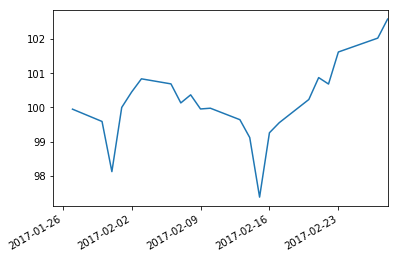

In [8]:
portfolio_value = pd.DataFrame(0,index=nse.get_traded_dates(start=trades.date.min()).index, columns=trades.symbol.unique())
portfolio_value['cash']= portfolio_value.join(cash, how='outer').cash.ffill()
portfolio_value['cash_balance']= portfolio_value['cash'].copy()
for trade in trades.itertuples():
    date = trade.date
    time = trade.time
    symbol = trade.symbol
    ttype = trade.type
    rate = trade.rate
    qty = trade.qty
    
    price = trade.price
    existing_cash = portfolio_value.loc[date, 'cash_balance']
#     print(price, existing_cash, new_cash)
    portfolio_value.loc[date:, 'cash_balance'] = portfolio_value.loc[date:, 'cash_balance'] - price
    
    if symbol not in close.columns:
        continue
    existing_worth = portfolio_value.loc[date, symbol]
    existing_qty = existing_worth /  close[symbol][date]
    
    if existing_qty == 0:
        # Fresh transaction

        if ttype == 1:
            portfolio_value.loc[date:, symbol] = qty * close[symbol][date:]
        else:
            # short sell
            portfolio_value.loc[date:, symbol] = qty * close[symbol][date:]
    else:
        if ttype == 1:
            new_qty = existing_qty + qty
            new_worth = existing_worth + price
        else:
            new_qty = existing_qty + qty
            new_worth = existing_worth - price
            if new_qty != 0:
                pass
#                 print(trade)
        portfolio_value.loc[date:, symbol] = new_qty * close[symbol][date:]
#         print(new_qty, new_worth)
#         print(portfolio_value.replace(0, np.nan).dropna(how='all'))
something = portfolio_value.drop(['cash'], axis=1).sum(axis=1)
# something = (something / np.abs(something.ix[0])).rename('port')

# portfolio_value[['cash']].join(something.rename('sdf'))['2017-01-25':].plot()
# profit = np.log(something.rename('sdf') / portfolio_value['cash'])['2017-01-25':]
# (100 * np.exp(profit.cumsum())).plot()
# profit
something = something.rename('sdf')['2017-01-25':]
ret = np.log(something / something.shift(1))
(100 * np.exp(ret.cumsum())).plot()

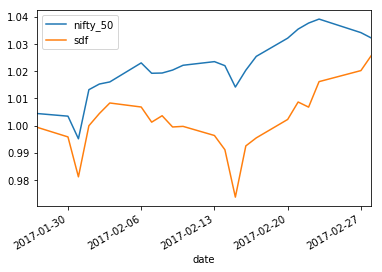

In [9]:
n50_ret = nse.get_index_eod_values(data='returns', index_list='nifty_50', start='2017')
# 1*np.exp(n50_ret.cumsum()) 
n50_ret = n50_ret.join(ret)
ret = n50_ret.dropna()
(np.exp(ret.cumsum())).plot()

In [216]:
(21700 - 21000)/ 20000

0.035

In [217]:
(8900 - 8150) / 8150

0.09202453987730061